### Introduction
In this assignment, we are asked to explore the artificial neural network (ANN) for prediction of 42,000 handwritten digit images in the MNIST dataset. The dataset comes from the machine learning competition website Kaggle. We need to use the TensorFlow library to build an ANN model that correctly identify digits from handwritten images. The challenge is to build a model that accurately distinguishes between each digit while taking into account the time it takes to train and test the data.

### Import Packages and Load the Data

In [1]:
%matplotlib inline
# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from time import time
from statistics import mean

In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 43
from numpy.random import seed
seed(43)

In [3]:
# data comes from: 
# https://www.kaggle.com/c/digit-recognizer/kernels

# load the data
df = pd.read_csv('train.csv')

### Data Exploration and Data Preparationand

In [4]:
# examine the shape of the loaded data
print('train_data shape:', df.shape, '\n')

# check for null values of the loaded data
print('null values of train_data:', sum(df.isnull().sum()))

train_data shape: (42000, 785) 

null values of train_data: 0


In [5]:
# examine the response count
print('response count\n', df.label.value_counts())

response count
 1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [6]:
# split the data into label and non-label datasets
# and convert them into arrays

# drop the label (target) of train dataset
X_train_data = (df.values[:,1:]).astype(np.float32)

# get the label (target) of train dataset 
y_train_data = (df.values[:,0]).astype(np.int32)

In [7]:
# get the images by specifying the labels (0 - 9)
my_list = []
for i in range(0, 10):
    a = np.where(y_train_data == i)[0][0:10].tolist()
    my_list.append(a)
    
# flatten the nested arrays
my_list = [val for sublist in my_list for val in sublist]

# index it and convert it to a dictionary
my_list1 = dict(list(enumerate(my_list, 1)))

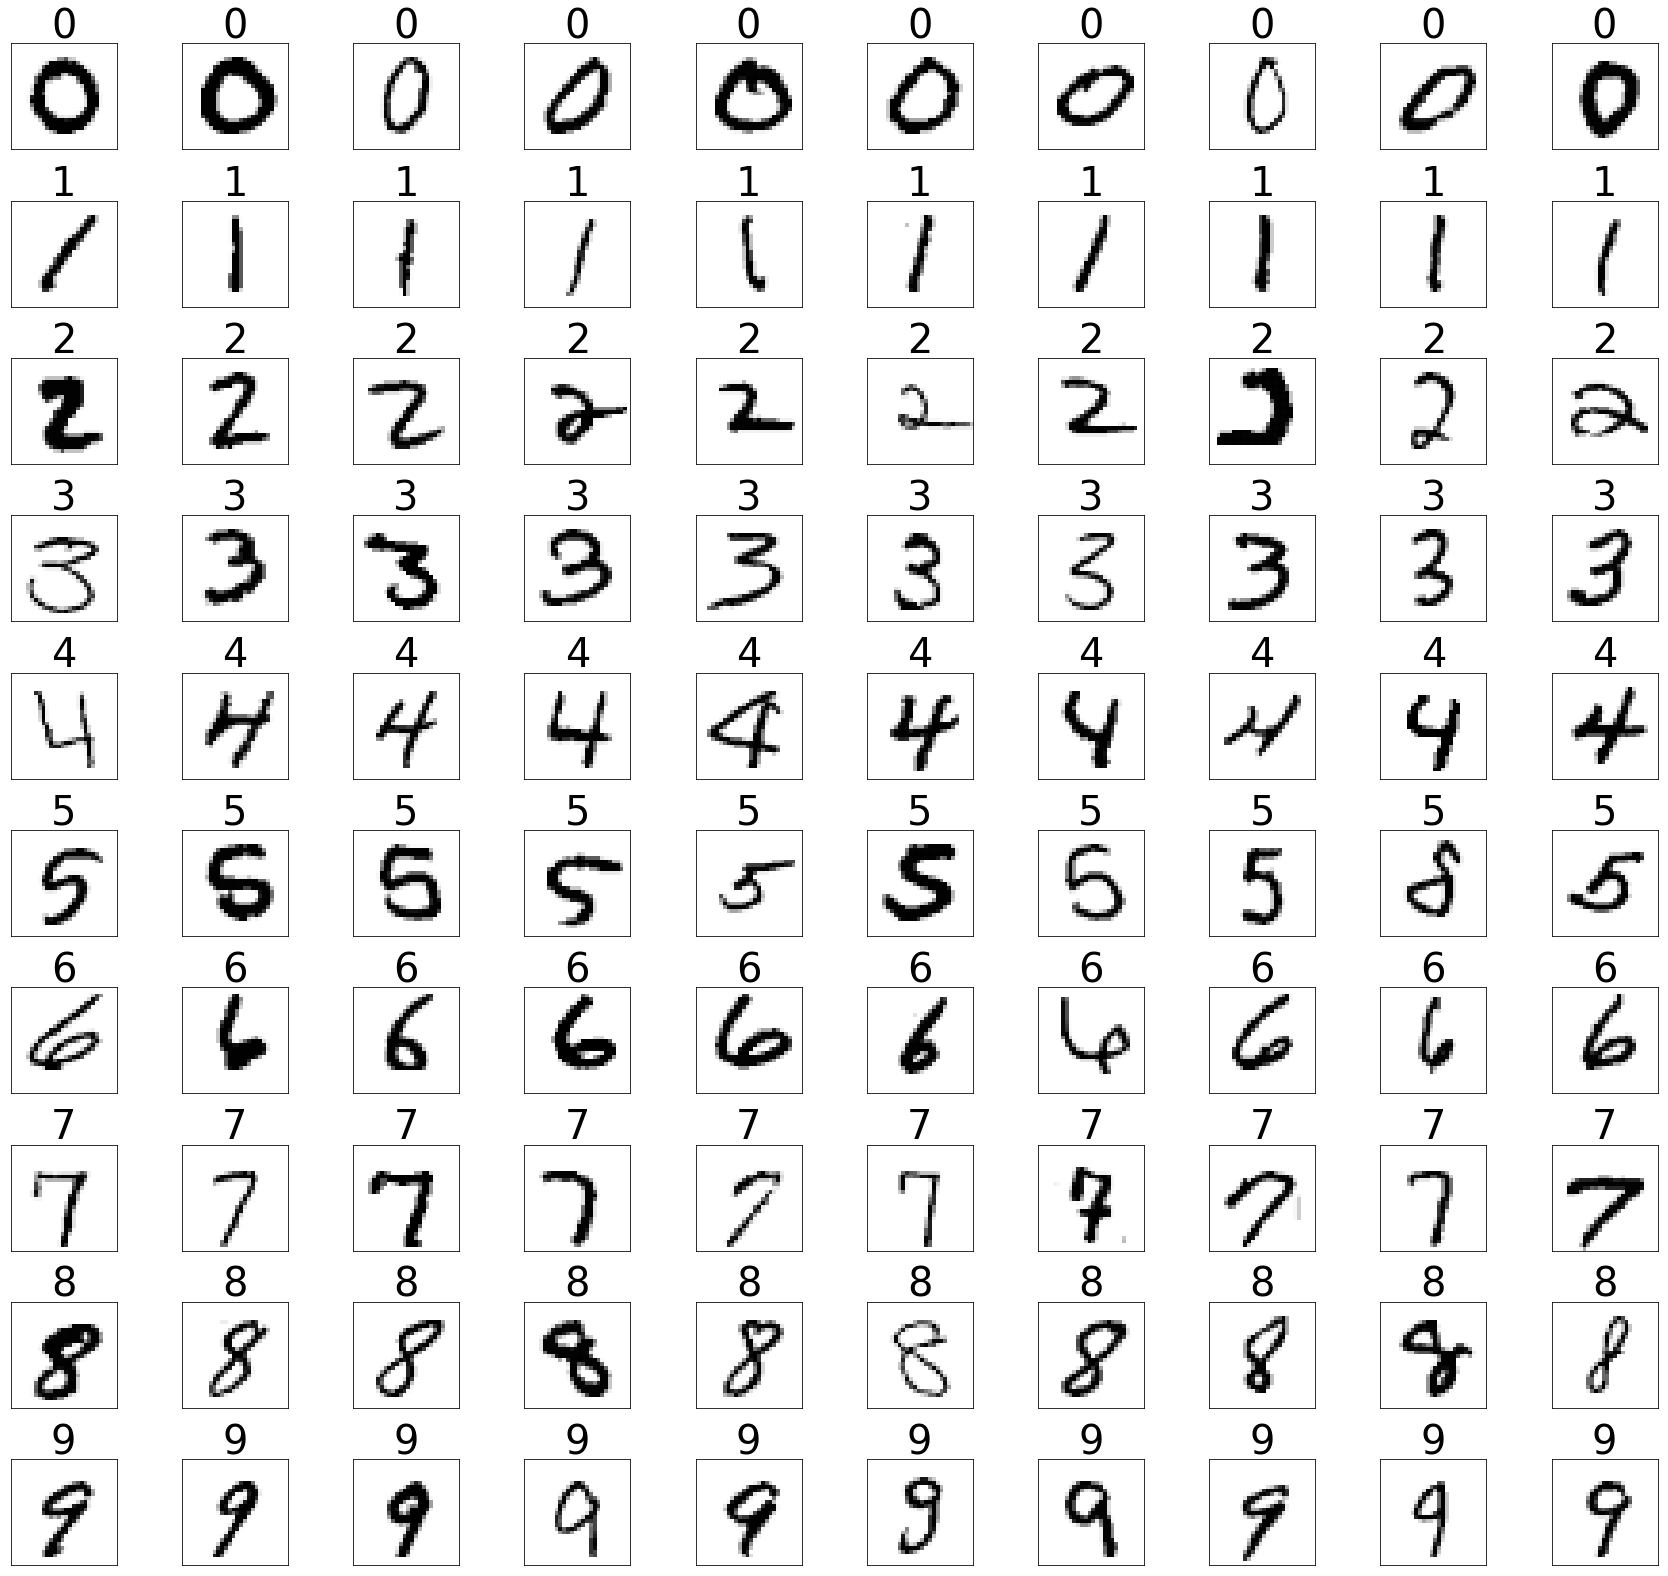

In [8]:
# plot a sample of the data
plt.figure(figsize = (24, 22))
for i, j in my_list1.items():
    plt.subplot(10, 10, i)
    grid_data = X_train_data[j].reshape(28, 28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = plt.cm.Greys)
    plt.title(y_train_data[j], fontsize = 40)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

In [9]:
# split the train and the testing set
X_train, X_test, y_train, y_test = train_test_split(
    X_train_data, y_train_data, test_size = 0.3, random_state = RANDOM_SEED)

In [10]:
# examine the shape of the data after splitting the train and the testing set
print('train data shape:', X_train.shape)
print('test data shape:', X_test.shape)

train data shape: (29400, 784)
test data shape: (12600, 784)


In [11]:
# reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# normalize it by dividing the values into 255.0

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

### Model Exploration

In [12]:
#function of NN
def set_model(num_layer, num_nodes):
    
    #develop sequential model
    model = tf.keras.Sequential()

    #faltten image by input layer
    model.add(tf.keras.layers.Flatten())
    
    for i in range(num_layer):
    # Relu activation function. i-th hidden layer
        model.add(tf.keras.layers.Dense(num_nodes, activation = tf.nn.relu))
    
    #output layer of 10 digits
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    
    #loss is the degree of error - what was classified incorrectly
    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', #mean_squared_error
             metrics=['accuracy'])
    return model  

In [13]:
#splitting the code into two chunks
def nn_model(num_layer, num_nodes):
        
    #recall the previous function    
    model = set_model(num_layer, num_nodes)
    
    #processing time start
    start = time()
    
    #fit the model 
    #epochs is a number of times to look over dataset
    model.fit(X_train, y_train, epochs = 1)
    
    #processing time end
    end = time()
    proc_time = np.round(end - start, 2)

    #evaluate model
    score_train, acc_train = np.round(model.evaluate(X_train, y_train), 3)
    score_test, acc_test = np.round(model.evaluate(X_test, y_test), 3)

    # performance score table
    col_names = ['Number of Layers','Nodes per Layer', 'Processing Time',\
                 'Training Set Accuracy', 'Test Set Accuracy']
    perf = pd.DataFrame([num_layer, num_nodes, proc_time, acc_train, acc_test],\
                        columns = [''], index = col_names).T
    
    return model, perf

In [15]:
#Run 1: 2 layers, 50 neurons
model_1, perf_1 = nn_model(num_layer = 2, num_nodes = 50);
perf_1

Train on 29400 samples
12600/12600 [==============================] - 0s 17us/sample - loss: 0.2411 - accuracy: 0.9275


,Number of Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
,2.0,50.0,1.42,0.938,0.927


In [16]:
#Run 2: 2 layers, 100 neurons
model_2, perf_2 = nn_model(num_layer = 2, num_nodes = 100);
perf_2

Train on 29400 samples
12600/12600 [==============================] - 0s 17us/sample - loss: 0.1823 - accuracy: 0.9442


,Number of Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
,2.0,100.0,1.44,0.956,0.944


In [17]:
#Run 3: 4 layers, 50 neurons
model_3, perf_3 = nn_model(num_layer = 4, num_nodes = 50);
perf_3

Train on 29400 samples
12600/12600 [==============================] - 0s 18us/sample - loss: 0.2304 - accuracy: 0.9294


,Number of Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
,4.0,50.0,1.72,0.939,0.929


In [18]:
#Run 4 - train: 4 layers, 100 neurons
model_4, perf_4 = nn_model(num_layer = 4, num_nodes = 100);
perf_4

Train on 29400 samples
12600/12600 [==============================] - 0s 20us/sample - loss: 0.1781 - accuracy: 0.9447


,Number of Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
,4.0,100.0,1.84,0.955,0.945


### Evaluation of Performance 

In [19]:
#performance chart
pd.concat([perf_1, perf_2, perf_3, perf_4], axis = 0)

,Number of Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
,2.0,50.0,1.42,0.938,0.927
,2.0,100.0,1.44,0.956,0.944
,4.0,50.0,1.72,0.939,0.929
,4.0,100.0,1.84,0.955,0.945


There is a tradeoff between processing times and accuracy scores. According to the benchmark study, the lower number of layers gave us less processing time, and higher neuron nodes gave us better accuracy. Model 4 and model 2 accuracy scores are close to each other. However, model 2 has lower processing time than model 4. We can conclude from our benchmark study that the optimal model for this assignment is model 2. We can evaluate model 2 results further. 

### Evaluation of Results

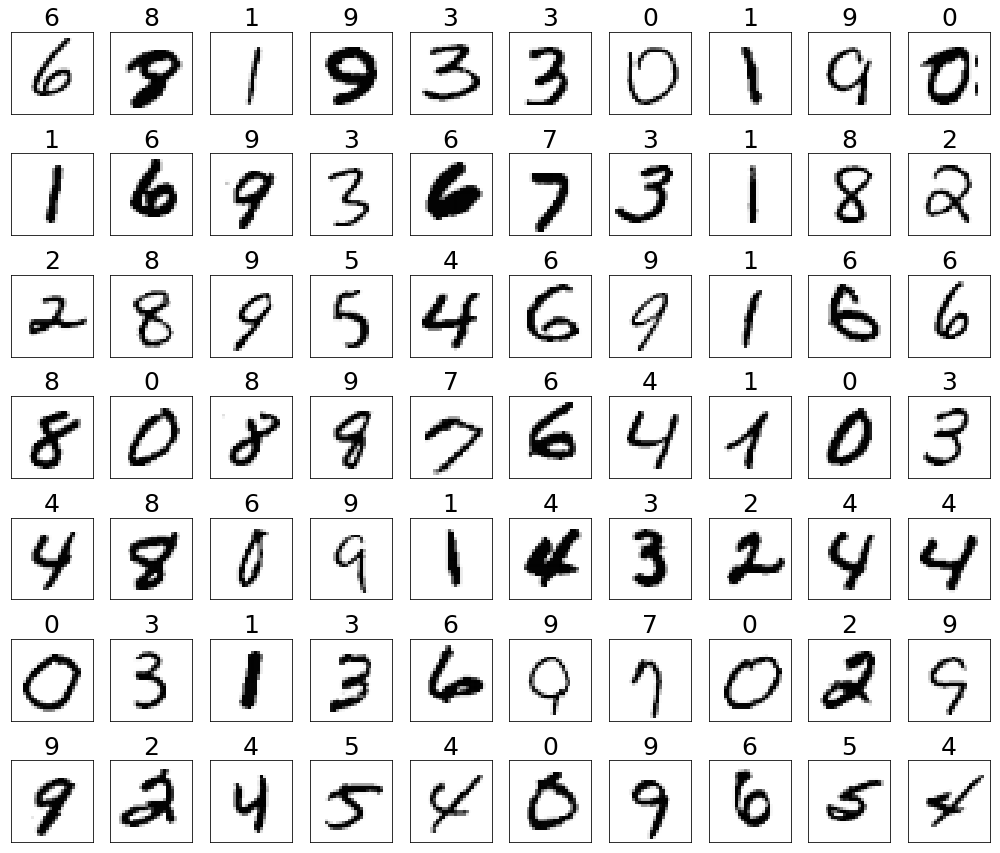

In [21]:
# plot predicted y of model_2

plt.figure(figsize = (14, 12))
for i in range(0, 70):
    plt.subplot(7, 10, i + 1)
    grid_data = X_test[i].reshape(28, 28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = plt.cm.Greys)
    plt.title(
        model_2.predict(X_test[i].reshape(1, 28, 28, 1)).argmax(),
        fontsize = 25)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

## visualization of a single digit
## plt.imshow(X_train[100].reshape(28, 28), cmap = plt.cm.Greys);

In [22]:
# Predict the values from the validation dataset
Y_pred = model_2.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = y_test

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
## confusion_mtx

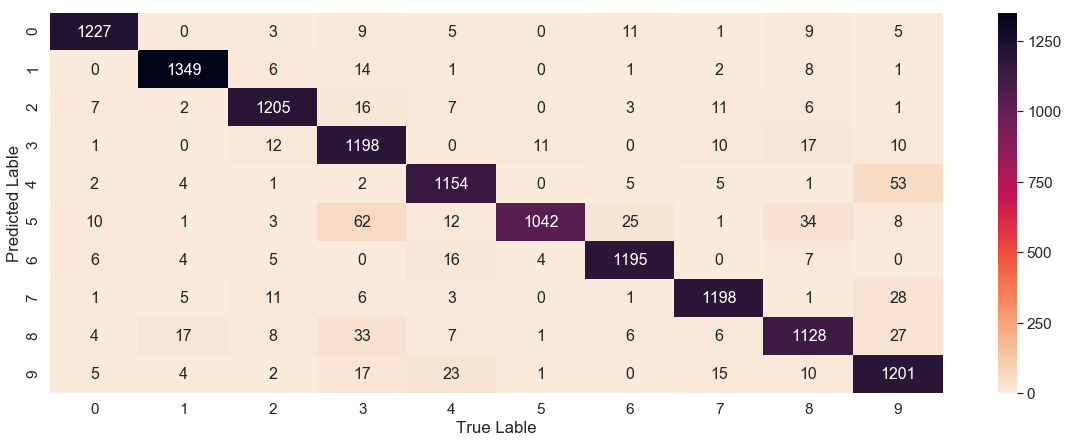

In [23]:
# plot confusion matrix
sns.set(font_scale=1.4)
df_cm = pd.DataFrame(confusion_mtx, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (20,7))
sns.heatmap(df_cm, annot=True, fmt = ".0f", cmap = sns.cm.rocket_r, annot_kws={'size':16})
plt.xlabel('True Lable')
plt.ylabel('Predicted Lable');

The confusion matrix highlights that some of the predicted handwritten digit/number images of model two were misclassified: 

* A small number of a handwritten digit 3 was predicted as either 5 or 8
* A small number of a handwritten digit 9 was predicted as 4, 7 and 8

However, 95% of the time our model was able to predict the handwritten digits right. We can see a sample of the misclassified digits in the next chart. 

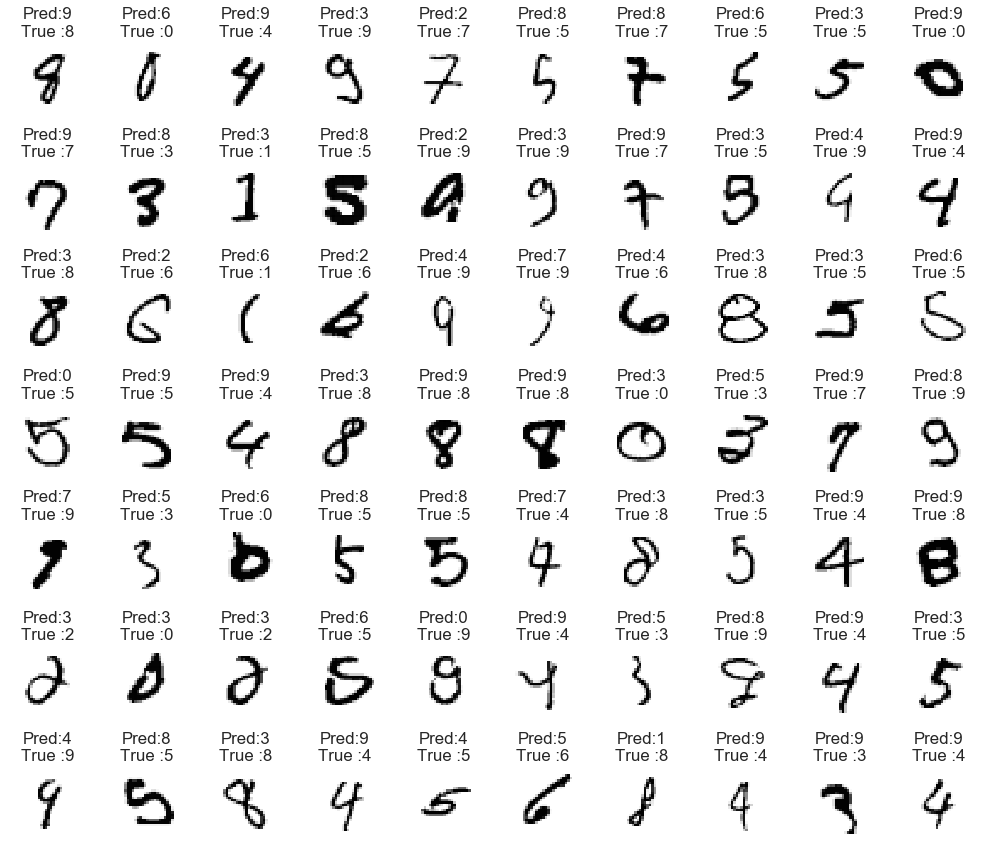

In [24]:
#find errors
errors = (Y_pred_classes - Y_true != 0)

#plot sample of errors
plt.figure(figsize = (14, 12))
for i in range(0, 70):
    plt.subplot(7, 10, i + 1)
    grid_data = X_test[errors][i].reshape(28, 28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = plt.cm.Greys)
    plt.title("Pred:{}\nTrue :{}".format(
        model_2.predict(X_test[errors][i].reshape(1, 28, 28, 1)).argmax(),
        y_test[errors][i]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

Here is a sample of misclassified digits. It is also difficult to distinguish some of the handwritten images for myself, such as 0 vs. 6 and 7 vs. 9. 

### Summary

In this assignment, we are asked to find the lowest computational cost (training-time) vs. highest modeling accuracy. Since it was our initial testing on the MNIST digits, we looked at improving on tuning the "number of layers" and "neuron nodes per layer," which are the key parameters of the model. With these parameters, we derived the processing time and accuracy scores for training and testing sets. As I mentioned earlier, there is some tradeoff between processing times and accuracy scores. According to the benchmark study (table above), the lower number of layers gave us less processing time, and higher neuron nodes gave us better accuracy. The second model achieved the optimal results by using the following parameters:  2 layers and 100 neuron nodes per layer with Relu activation. The processing time of model 2 is 1.44 (the second-lowest) and accuracy score for the training set is 95.6% (the highest), and the testing set is 94.4% (the second-highest). Since we are trying to solve for minimal training cost (time) and higher accuracy scores with tuning two key parameters, I recommend the second model along with lower number of layers and higher neuron nodes. We can tune the number of training epochs (iterations), the batch size, and other parameters to improve the model further. 